<a href="https://colab.research.google.com/github/chaeeun0405/ML_Class/blob/main/5%EC%A3%BC%EC%B0%A8/ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

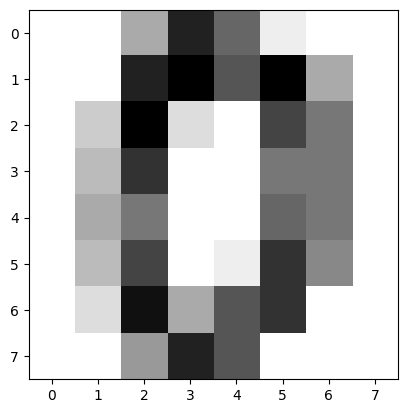

In [11]:
# 데이터셋 읽기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [12]:
#이미지 평탄화
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [13]:
#훈련, 테스트 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)

In [14]:
# knn 모델과 학습
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [15]:
# 테스트 데이터로 예측해본다.
y_pred = clf.predict(X_test)
# 정확도를 계산한다.

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9888888888888889


[7]


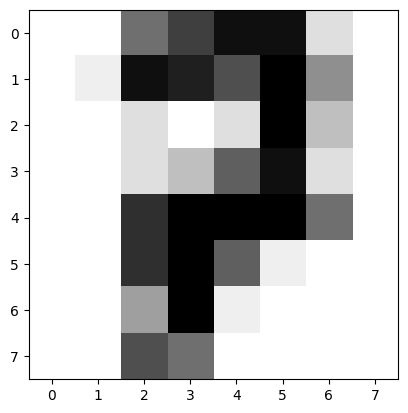

In [18]:
# 이미지를 출력하기 위하여 평탄화된 이미지를 다시 8×8 형상으로 만든다.
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

y_pred = clf.predict([X_test[10]]) # 입력은 항상 2차원 행렬이어야 한다.
print(y_pred)

In [19]:
# 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [20]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 학습 데이터(X_train)를 스케일링
# fit()으로 평균과 표준편차를 계산하고, transform()으로 변환
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터(X_test)를 스케일링
# X_train에서 계산된 평균과 표준편차를 그대로 사용해 변환
X_test_scaled = scaler.transform(X_test)

In [21]:
# -----------------------------
# 모델 구성
# -----------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

# -----------------------------
# 스케일링된 데이터를 사용하여 모델 학습
# -----------------------------

dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [22]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

# 정답값 출력
y_test

array([4, 4, 8, 0, 5, 4, 3, 2, 0, 2, 7, 7, 0, 8, 7, 2, 0, 8, 7, 7, 5, 6,
       6, 6, 1, 4, 3, 0, 7, 2, 9, 1, 6, 6, 5, 8, 7, 8, 0, 1, 4, 5, 2, 1,
       7, 3, 1, 7, 5, 1, 8, 7, 7, 0, 6, 9, 8, 4, 4, 6, 5, 1, 9, 3, 8, 0,
       6, 5, 3, 3, 7, 9, 7, 9, 6, 5, 5, 1, 5, 8, 8, 2, 0, 6, 9, 1, 1, 8,
       8, 8, 2, 9, 2, 2, 1, 7, 5, 9, 2, 8, 9, 4, 1, 1, 0, 1, 6, 4, 6, 3,
       2, 0, 2, 9, 7, 9, 4, 7, 8, 1, 6, 6, 0, 5, 2, 2, 4, 7, 5, 4, 2, 4,
       5, 8, 0, 2, 7, 9, 4, 2, 8, 8, 2, 6, 1, 5, 6, 4, 3, 8, 9, 8, 9, 2,
       1, 1, 7, 5, 7, 0, 5, 9, 2, 3, 3, 6, 5, 8, 3, 4, 6, 8, 8, 2, 9, 5,
       2, 9, 5, 9, 7, 2, 6, 1, 1, 8, 9, 6, 4, 3, 0, 1, 8, 5, 8, 2, 9, 0,
       3, 1, 4, 4, 0, 4, 2, 7, 1, 7, 1, 7, 0, 7, 0, 9, 5, 0, 8, 3, 5, 5,
       7, 1, 2, 1, 9, 0, 0, 1, 9, 8, 6, 2, 4, 0, 3, 1, 8, 9, 2, 3, 0, 4,
       5, 2, 8, 3, 9, 0, 5, 7, 6, 9, 3, 5, 1, 4, 9, 5, 5, 3, 8, 2, 4, 5,
       2, 5, 1, 8, 7, 4, 9, 3, 0, 3, 1, 1, 6, 9, 5, 8, 6, 5, 9, 4, 1, 2,
       7, 1, 4, 7, 8, 6, 3, 7, 8, 0, 3, 9, 4, 5, 5,

In [23]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.2667
[[16  9  0  0  0  0  0  1  5  1]
 [ 0 23  0  0  0  0  0  0 19  0]
 [ 1  1  0  0  0  0  0  0 36  0]
 [ 1  1  0  0  0  0  0  0 27  0]
 [ 0 11  0  0 20  0  0  0  1  0]
 [ 0  6  0  0  0  0  0  0 32  2]
 [ 1 18  0  0  3  0  0  0  4  5]
 [ 2  8  0  0  0  0  0  6 23  0]
 [ 0  5  0  1  0  0  0  0 30  2]
 [ 0  0  0  1  0  0  0  1 36  1]]
=== RF Test Accuracy ===
Random Forest : 0.4139
[[31  1  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  2]
 [ 0 20  2  0  0  0  0  0 13  3]
 [ 1  5  0  0  0  0  0  0 10 13]
 [ 0  5  0  0 26  0  0  0  1  0]
 [ 1 16  0  0  0  2  0  0 12  9]
 [ 1  4  0  0  5  0  4  0 17  0]
 [ 0 15  0  0  1  0  0  0 20  3]
 [ 0 22  0  0  0  0  0  0 16  0]
 [ 0  2  0  0  0  0  0  0  9 28]]
=== LR Test Accuracy ===
Logistic Reg. : 0.7722
[[30  1  0  0  0  1  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  9 28  0  0  0  0  0  1  0]
 [ 0  1  0 24  0  0  0  0  2  2]
 [ 0 24  0  0  5  0  1  0  0  2]
 [ 0  4  0  0  0 33  1  0  0 